In [40]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
df = pd.read_csv('/kaggle/input/titanic/Titanic.csv')
df

/kaggle/input/titanic/Titanic.csv


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [317]:
total_men = df['Sex'].value_counts()['male']
total_women = df['Sex'].value_counts()['female']

# Подсчет выживших мужчин и женщин
survived_men = df[(df['Sex'] == 'male') & (df['Survived'] == 1)].shape[0]
survived_women = df[(df['Sex'] == 'female') & (df['Survived'] == 1)].shape[0]
categories = ['Всего мужчин','Выжило мужчин', 'Всего женщин', 'Выжило женщин']
values = [total_men,survived_men, total_women, survived_women]
plt.bar(categories, values, color=['Black', 'green', 'black', 'green'])
for i, value in enumerate(values):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom', fontweight='regular')
plt.ylabel('Количество людей')
plt.show() #по графику можно заметить что выживало примерно 1 из 6 мужчин и 2 из 3 женщин. 
#Можно предположить, что мужчины, жертвуя собой, спасали женщин и детей. 
#Теперь интересно будет узнать сколько детей из выживших мужчин и женщин, для этого нужно распределить пассажиров по возрасту.

KeyError: 'male'

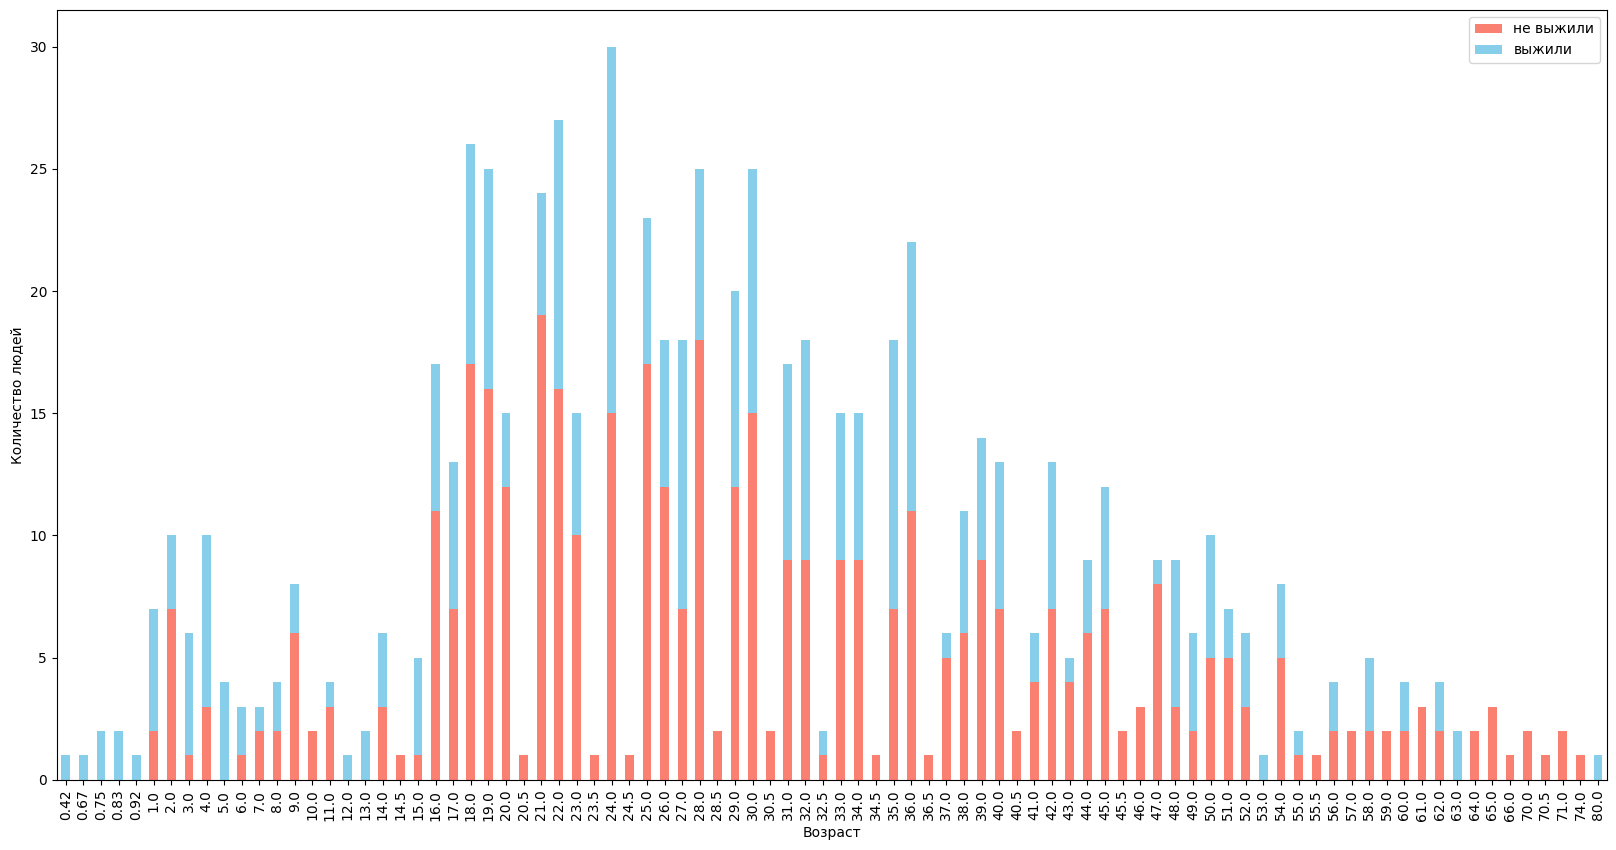

In [79]:

age_survival_counts = pd.crosstab(df['Age'], df['Survived'], colnames=['Survived'])
age_survival_counts.columns = ['не выжили', 'выжили']  

age_survival_counts.plot(kind='bar', stacked=True, color=['salmon', 'skyblue'], figsize=(20, 10))
plt.xlabel('Возраст')
plt.ylabel('Количество людей')
plt.legend()
plt.show() 
#по графику можно увидеть, что большинство пассажиров было от 16 до 54 лет, но среди них и большинство погибших

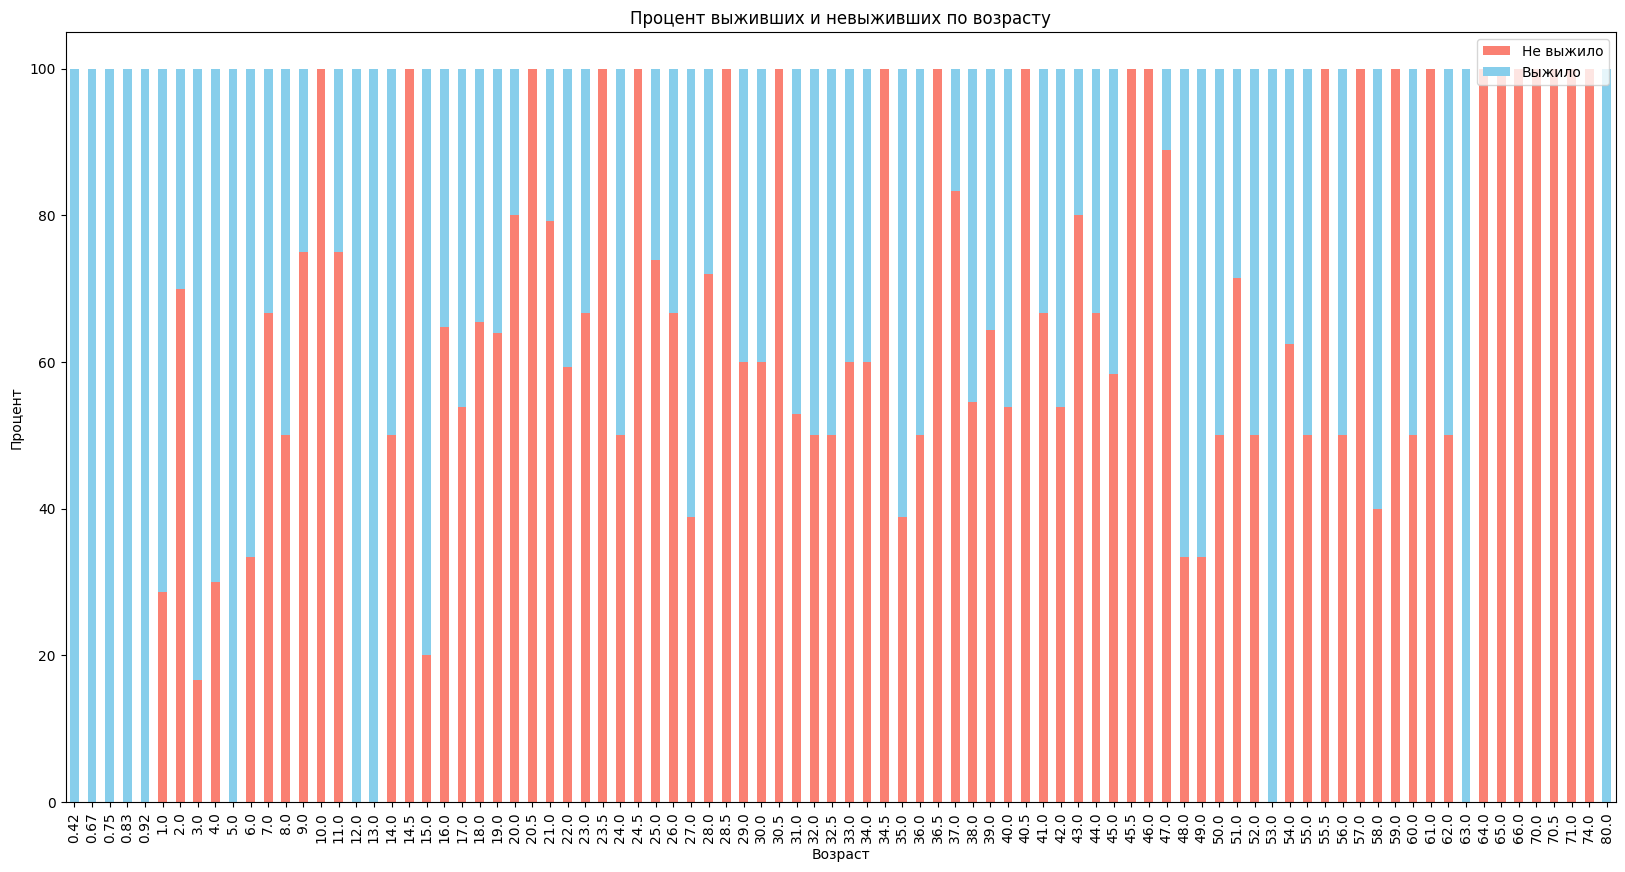

In [83]:
age_survival_counts = pd.crosstab(df['Age'], df['Survived'], colnames=['Survived'])

age_survival_counts.columns = ['Не выжило', 'Выжило']

age_survival_percent = age_survival_counts.div(age_survival_counts.sum(axis=1), axis=0) * 100

age_survival_percent.plot(kind='bar', stacked=True, color=['salmon', 'skyblue'], figsize=(20, 10))
plt.xlabel('Возраст')
plt.ylabel('Процент')
plt.title('Процент выживших и невыживших по возрасту')
plt.legend()
plt.show()
#по графику можно увидеть, что у пожилых людей была очень низкая вероятность выжить: из всех выжил только человек 80-ми лет.
#наиболее высокий процент выживания был у детей до 16 лет, также есть преобладание синего цвета в среднем возрасте мы можем понять на основании прошлого анализа, что большинство из них - женщины. 

In [85]:
age_bins = [0, 18, 25, 60, 100]  # Границы возрастов
age_labels = ['child', 'youth', 'adult', 'aged']  # Категории

df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False) #заменяем возраст категориями  
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,youth
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,youth
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,adult


/tmp/ipykernel_30/1775596755.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_counts = df[df['Survived'] == 1].groupby(['AgeGroup', 'Sex']).size().unstack(fill_value=0)


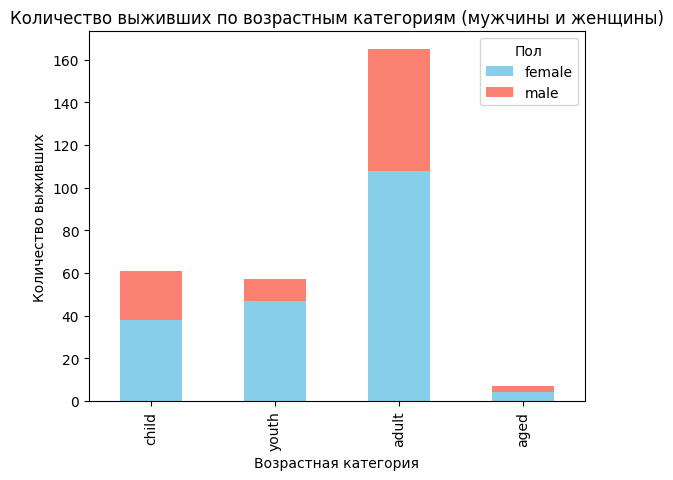

In [89]:
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Подсчет выживших мужчин и женщин по возрастным категориям
survival_counts = df[df['Survived'] == 1].groupby(['AgeGroup', 'Sex']).size().unstack(fill_value=0)

# Построение графика
survival_counts.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.xlabel('Возрастная категория')
plt.ylabel('Количество выживших')
plt.title('Количество выживших по возрастным категориям')
plt.legend(title='Пол')
plt.show()
#так и есть, большинство выживших во всех категориях - женщины. Ну и можно наглядно увидеть преимущество взрослых  в выживании, но их и было большинство на корабле. 

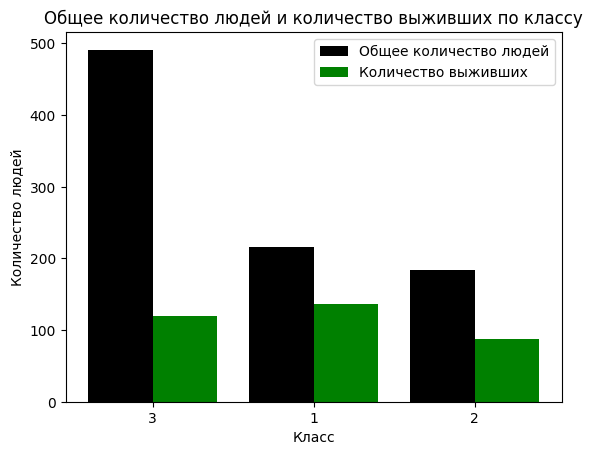

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,youth
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,youth
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,adult


In [99]:
total_counts = df['Pclass'].value_counts()


survived_counts = df.groupby('Pclass')['Survived'].sum()


classes = total_counts.index
total_people = total_counts.values
survived_people = survived_counts.reindex(classes, fill_value=0).values  

bar_width = 0.4
x = range(len(classes))

plt.bar(x, total_people, width=bar_width, label='Общее количество людей', color='black')
plt.bar([p + bar_width for p in x], survived_people, width=bar_width, label='Количество выживших', color='green')

# Настройка графика
plt.xlabel('Класс')
plt.ylabel('Количество людей')
plt.title('Общее количество людей и количество выживших по классу')
plt.xticks([p + bar_width / 2 for p in x], classes)  
plt.legend()
plt.show()
df
#по графику очевидно, что шансов выжить меньше всего было у пассажиров, ехавших в 3-ьем классе. Больше всего - у пассажиров 1-го класса. У 2-го класса ситуация значительно лучше чем у 3-ьего, но немного отстает от 1-го.

In [102]:
df['Family_Size'] = df['SibSp'] + df['Parch'] #создаем новый столбец с общим количеством родственников у каждого пассажира

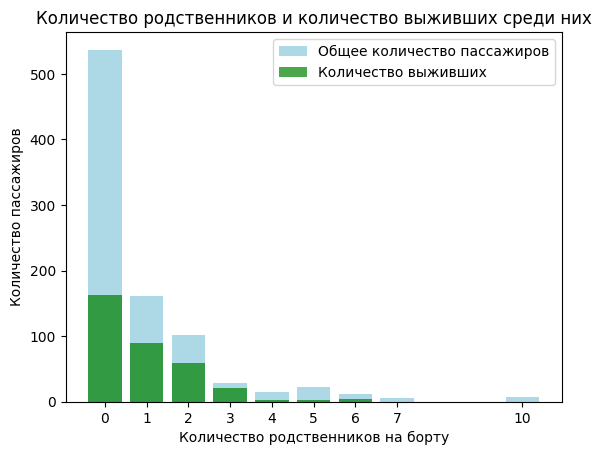

In [108]:
relatives_counts = df.groupby('Family_Size').agg(
    Total=('PassengerId', 'count'),
    Survived=('Survived', 'sum')
).reset_index()

plt.bar(relatives_counts['Family_Size'], relatives_counts['Total'], label='Общее количество пассажиров', color='lightblue')
plt.bar(relatives_counts['Family_Size'], relatives_counts['Survived'], label='Количество выживших', color='green', alpha=0.7)

plt.xlabel('Количество родственников на борту')
plt.ylabel('Количество пассажиров')
plt.title('Количество родственников и количество выживших среди них')
plt.xticks(relatives_counts['Family_Size'])  
plt.legend()
plt.show()
#как можно заметить по графику, большинство пассажиров путешествовало в одиночку, а также то, что у пассажиров с 1-3 родственниками шанс выжить был значительно меньше чем у остальных.

In [119]:
df['Status'] = df['Name'].str.extract(r',\s*([^\.]*)\.') #проведём аналитику статуса людей, потому что люди высокого статуса скорее всего выживали больше чем остальные, либо же наоборот, альтруистично жертвовали собой. 
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Family_Size,Status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,youth,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,adult,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,adult,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,adult,0,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,youth,0,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,3,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,adult,0,Mr


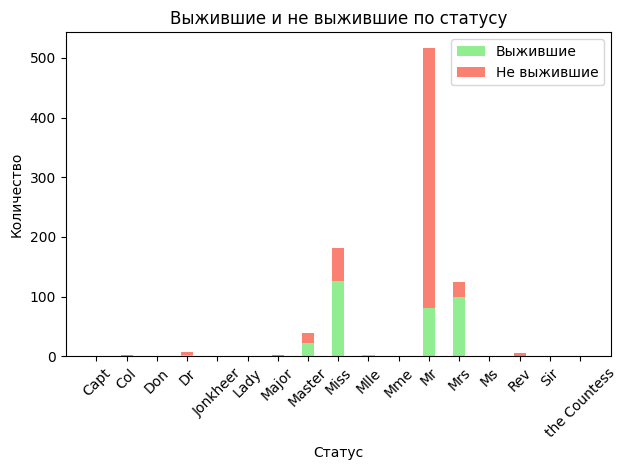

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Family_Size,Status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,youth,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,adult,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,adult,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,adult,0,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,youth,0,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,3,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,adult,0,Mr


In [124]:
status_counts = df.groupby('Status').agg(
    Total=('Survived', 'count'),
    Survived=('Survived', 'sum')
).reset_index()

status_counts['Not Survived'] = status_counts['Total'] - status_counts['Survived']


x = status_counts['Status']
width = 0.4  

fig, ax = plt.subplots()

bars1 = ax.bar(x, status_counts['Survived'], width, label='Выжившие', color='lightgreen')
bars2 = ax.bar(x, status_counts['Not Survived'], width, bottom=status_counts['Survived'], label='Не выжившие', color='salmon')


ax.set_xlabel('Статус')
ax.set_ylabel('Количество')
ax.set_title('Выжившие и не выжившие по статусу')
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()#можно заметить множество одиночных статусов, мы их объединим по признаку с другими, чтобы не усложнять обучение нейросети. Но по графику уже можно заметить, что, действительно мужчины в статусе Mr выживали реже других. 
df

In [131]:
df['Status'] = df['Status'].replace(['Mlle', 'Ms', 'Lady', 'the Countess', 'Mme', 'Dona'], 'Miss')
df['Status'] = df['Status'].replace(['Capt', 'Don', 'Major', 'Sir', 'Jonkheer'], 'Sir')
df['Status']=df['Status'].replace(['Rev','Col','Dr'],'Mr')
df #объединим редкие статусы

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Family_Size,Status
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,youth,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,adult,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,adult,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,adult,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,adult,0,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,adult,0,Mr
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,youth,0,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,3,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,adult,0,Mr


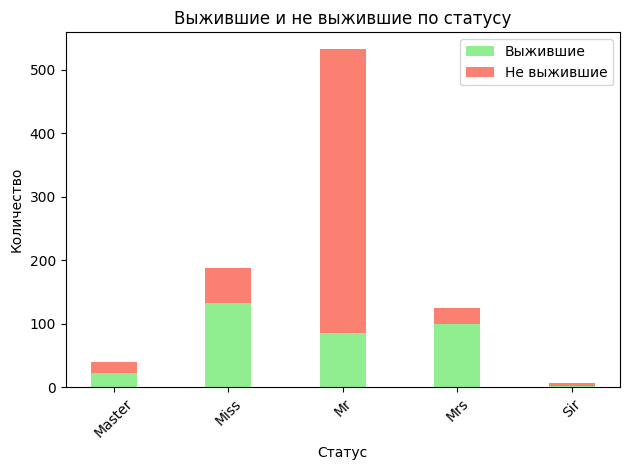

In [126]:
status_counts = df.groupby('Status').agg(
    Total=('Survived', 'count'),
    Survived=('Survived', 'sum')
).reset_index()

status_counts['Not Survived'] = status_counts['Total'] - status_counts['Survived']


x = status_counts['Status']
width = 0.4  

fig, ax = plt.subplots()

bars1 = ax.bar(x, status_counts['Survived'], width, label='Выжившие', color='lightgreen')
bars2 = ax.bar(x, status_counts['Not Survived'], width, bottom=status_counts['Survived'], label='Не выжившие', color='salmon')


ax.set_xlabel('Статус')
ax.set_ylabel('Количество')
ax.set_title('Выжившие и не выжившие по статусу')
ax.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show() #по графику можно увидеть, что большинство погибших - Mr. примеч.Master(люди до 18 лет).

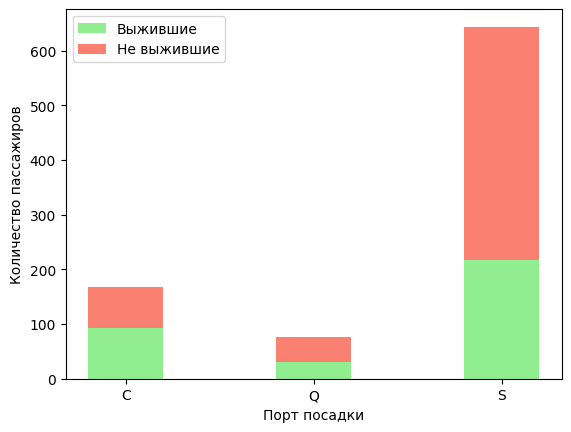

In [136]:
embarked_counts = df.groupby('Embarked').agg(
    Total=('Survived', 'count'),
    Survived=('Survived', 'sum')
).reset_index()

x = embarked_counts['Embarked']
width = 0.4

fig, ax = plt.subplots()

bars1 = ax.bar(x, embarked_counts['Survived'], width, label='Выжившие', color='lightgreen')
bars2 = ax.bar(x, embarked_counts['Total'] - embarked_counts['Survived'], width, 
                bottom=embarked_counts['Survived'], label='Не выжившие', color='salmon')

ax.set_xlabel('Порт посадки')
ax.set_ylabel('Количество пассажиров')
ax.legend()

plt.show() #по графику можно понять, что основная масса пассажиров была из порта S, и шанс выжить у них был меньше всего. Могу предположить, что большинство пассажиров порта S были из 3-ьего класса.

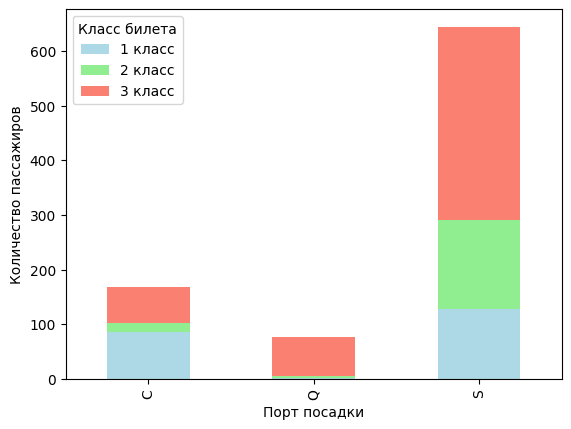

In [140]:
embarked_pclass_counts = df.groupby(['Embarked', 'Pclass']).size().unstack(fill_value=0)

embarked_pclass_counts.plot(kind='bar', stacked=True, color=['lightblue', 'lightgreen', 'salmon'])

plt.xlabel('Порт посадки')
plt.ylabel('Количество пассажиров')
plt.legend(title='Класс билета', labels=['1 класс', '2 класс', '3 класс'])
plt.show()#Так и оказалось, 3-ий класс состоял в основном из пассажиров, зашедших в порту S. А пассажиры из порта C имели высокую выживаемость, потому что больше чем половина из них оказалась в 1-ом классе.

In [143]:
df.isnull().sum() #можем заметить большое количество пустых значений в возрасте и номерах кают

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AgeGroup       177
Family_Size      0
Status           0
dtype: int64

In [148]:
df['Age'] = df.groupby('Status')['Age'].transform(lambda x: x.fillna(x.median()))#заполняем пропущенный возраст медианным значением по статусной группе (так на мой взгляд значения будут не кардинально различаться).
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False) #заново заполняем возрастные группы, чтобы устранить пропуски.
df.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
AgeGroup         0
Family_Size      0
Status           0
dtype: int64

In [149]:
df.info() #все object значения нужно привести к int/float, это необходимо для корректного обучения нейросети.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  AgeGroup     891 non-null    category
 13  Family_Size  891 non-null    int64   
 14  Status       891 non-null    object  
dtypes: category(1), float64(2), int64(6), object(6)
memory usage: 98.6+ KB


In [150]:
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
from sklearn.preprocessing import LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
df  #все столбцы со значениями object приводим к int значениям с помощью Label encoder'а

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Family_Size,Status
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2,youth,1,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0,adult,1,3
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2,adult,0,1
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2,adult,1,3
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2,adult,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,0,0,101,13.0000,147,2,adult,0,2
887,888,1,1,303,0,19.0,0,0,14,30.0000,30,2,youth,0,1
888,889,0,3,413,0,22.0,1,2,675,23.4500,147,2,youth,3,1
889,890,1,1,81,1,26.0,0,0,8,30.0000,60,0,adult,0,2


In [151]:
df.isnull().sum()#убеждаемся, что нет пустых значений.

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
AgeGroup       0
Family_Size    0
Status         0
dtype: int64

In [157]:
categorical_cols = df.select_dtypes(include=['category']).columns
label_encoders = {}
from sklearn.preprocessing import LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le
df #заменяем тип category на int

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Family_Size,Status
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2,3,1,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0,0,1,3
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2,0,0,1
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2,0,1,3
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,0,0,101,13.0000,147,2,0,0,2
887,888,1,1,303,0,19.0,0,0,14,30.0000,30,2,3,0,1
888,889,0,3,413,0,22.0,1,2,675,23.4500,147,2,3,3,1
889,890,1,1,81,1,26.0,0,0,8,30.0000,60,0,0,0,2


In [158]:
X = df.drop(columns=['Survived']) 
y = df['Survived'] #разделяем датасет для обучения

In [160]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')#создаем и обучаем первую модель

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.3799 - loss: 0.7375 - val_accuracy: 0.6853 - val_loss: 0.6368
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6871 - loss: 0.6238 - val_accuracy: 0.7343 - val_loss: 0.5693
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7585 - loss: 0.5591 - val_accuracy: 0.7692 - val_loss: 0.5121
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7744 - loss: 0.5196 - val_accuracy: 0.7832 - val_loss: 0.4699
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7865 - loss: 0.4956 - val_accuracy: 0.8112 - val_loss: 0.4381
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8112 - loss: 0.4467 - val_accuracy: 0.8252 - val_loss: 0.4160
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8211 - loss: 0.4142 - val_accuracy: 0.8322 - val_loss: 0.4059
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8076 - loss: 0.4247 - val_accuracy: 0.8322 - val_loss: 0.4020
Ep

In [161]:
df.corr()#по таблице корреляции можно заметить, что больше всего коррелируют со столбцом Survived столбцы Pclass,Sex,Fare и Cabin.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,Family_Size,Status
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,0.042939,0.040679,-0.057527,-0.001652,-0.056554,0.012658,-0.035077,0.013083,-0.057883,-0.040143,0.061653
Survived,-0.005007,1.000000,-0.338481,-0.057343,-0.543351,-0.076500,-0.035322,0.081629,-0.164549,0.257307,-0.254888,-0.163517,0.069687,0.016639,-0.081053
Pclass,-0.035144,-0.338481,1.000000,0.052831,0.131900,-0.350667,0.083081,0.018443,0.319869,-0.549500,0.684121,0.157112,0.194314,0.065997,-0.133110
Name,-0.038559,-0.057343,0.052831,1.000000,0.020314,0.048518,-0.017230,-0.049105,0.047348,-0.049173,0.061959,-0.004557,-0.056128,-0.036309,0.010565
Sex,0.042939,-0.543351,0.131900,0.020314,1.000000,0.099934,-0.114631,-0.245489,0.059372,-0.182333,0.096681,0.104057,-0.190166,-0.200988,0.054010
Age,0.040679,-0.076500,-0.350667,0.048518,0.099934,1.000000,-0.263963,-0.187950,-0.073224,0.097282,-0.245347,-0.012509,-0.583425,-0.274306,0.510506
SibSp,-0.057527,-0.035322,0.083081,-0.017230,-0.114631,-0.263963,1.000000,0.414838,0.079461,0.159651,0.043593,0.066654,0.155262,0.890712,-0.216235
Parch,-0.001652,0.081629,0.018443,-0.049105,-0.245489,-0.187950,0.414838,1.000000,0.020003,0.216225,-0.028324,0.038322,0.122341,0.783111,-0.102761
Ticket,-0.056554,-0.164549,0.319869,0.047348,0.059372,-0.073224,0.079461,0.020003,1.000000,-0.013885,0.243696,-0.006041,0.091908,0.064302,-0.044704
Fare,0.012658,0.257307,-0.549500,-0.049173,-0.182333,0.097282,0.159651,0.216225,-0.013885,1.000000,-0.503355,-0.221226,-0.030138,0.217138,-0.024325


Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8460 - loss: 0.3712 - val_accuracy: 0.8322 - val_loss: 0.3878
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8245 - loss: 0.3723 - val_accuracy: 0.8392 - val_loss: 0.3911
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8516 - loss: 0.3536 - val_accuracy: 0.8462 - val_loss: 0.3856
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8411 - loss: 0.3687 - val_accuracy: 0.8462 - val_loss: 0.3874
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8666 - loss: 0.3434 - val_accuracy: 0.8462 - val_loss: 0.3879
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8538 - loss: 0.3399 - val_accuracy: 0.8531 - val_loss: 0.3864
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8630 - loss: 0.3182 - val_accuracy: 0.8531 - val_loss: 0.3872
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8600 - loss: 0.3396 - val_accuracy: 0.8462 - val_loss:

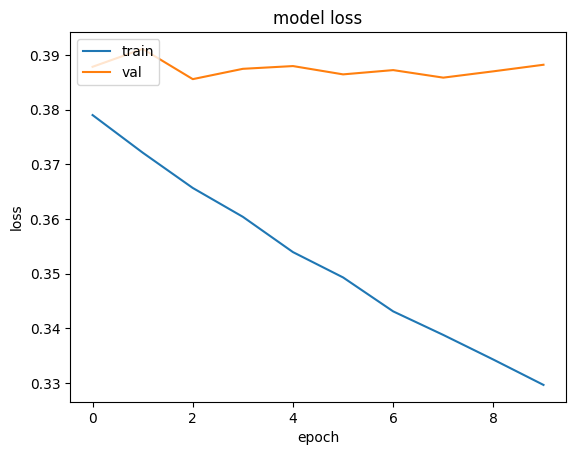

In [162]:
import matplotlib.pyplot as plt
%matplotlib inline
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [173]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the neural network model
model = Sequential()
model.add(Dense(64, activation='tanh', input_shape=(X_train.shape[1],)))
model.add(Dense(32, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=25, batch_size=64, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')#у второй модели точность уже выше

Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.6419 - loss: 0.6869 - val_accuracy: 0.7762 - val_loss: 0.5449
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7419 - loss: 0.5575 - val_accuracy: 0.7692 - val_loss: 0.4825
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7443 - loss: 0.5214 - val_accuracy: 0.7902 - val_loss: 0.4491
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7668 - loss: 0.4848 - val_accuracy: 0.8112 - val_loss: 0.4312
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7721 - loss: 0.4752 - val_accuracy: 0.8322 - val_loss: 0.4199
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8082 - loss: 0.4432 - val_accuracy: 0.8252 - val_loss: 0.4149
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7928 - loss: 0.4650 - val_accuracy: 0.8252 - val_loss: 0.4124
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8103 - loss: 0.4321 - val_accuracy: 0.8322 - val_loss: 0.4096
Epoch 9/30
9/9 ━━━

Epoch 1/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8413 - loss: 0.3711 - val_accuracy: 0.8601 - val_loss: 0.3992
Epoch 2/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8379 - loss: 0.3889 - val_accuracy: 0.8531 - val_loss: 0.3987
Epoch 3/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8352 - loss: 0.3886 - val_accuracy: 0.8601 - val_loss: 0.3990
Epoch 4/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8387 - loss: 0.3775 - val_accuracy: 0.8601 - val_loss: 0.4005
Epoch 5/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8266 - loss: 0.3875 - val_accuracy: 0.8601 - val_loss: 0.4017
Epoch 6/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8057 - loss: 0.4106 - val_accuracy: 0.8601 - val_loss: 0.4013
Epoch 7/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8405 - loss: 0.3751 - val_accuracy: 0.8531 - val_loss: 0.3973
Epoch 8/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8369 - loss: 0.3846 - val_accuracy: 0.8462 - val_loss: 0.3970
Epoch 9

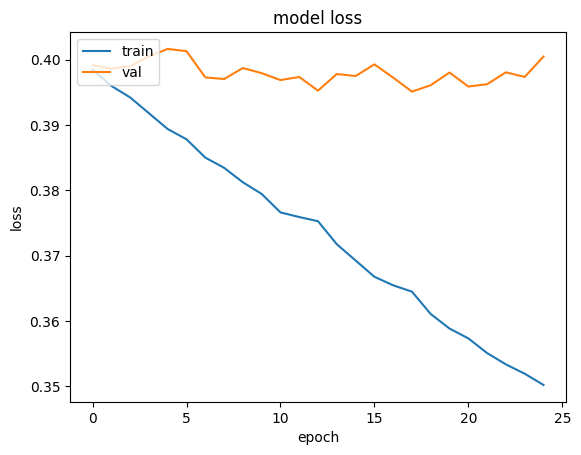

In [174]:
import matplotlib.pyplot as plt
%matplotlib inline
history = model.fit(X_train, y_train, epochs=25, batch_size=64, validation_split=0.2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()#график всё также странный

In [180]:
from keras.regularizers import l2

from keras.layers import Dropout


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the neural network model
model = Sequential()
model.add(Dense(64, activation='tanh', kernel_regularizer=l2(0.1)))
model.add(Dense(32, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

model.add(Dropout(0.1))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=25, batch_size=64, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')#попробовал добавить l2 регуляриацию,  и внедрить дропаут.

Epoch 1/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.5641 - loss: 3.5669 - val_accuracy: 0.8112 - val_loss: 2.5509
Epoch 2/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7275 - loss: 3.0059 - val_accuracy: 0.8322 - val_loss: 2.3066
Epoch 3/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7090 - loss: 3.0599 - val_accuracy: 0.8322 - val_loss: 2.1074
Epoch 4/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7753 - loss: 2.6867 - val_accuracy: 0.8392 - val_loss: 1.9410
Epoch 5/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7391 - loss: 2.6888 - val_accuracy: 0.8601 - val_loss: 1.7934
Epoch 6/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7903 - loss: 2.2092 - val_accuracy: 0.8462 - val_loss: 1.6587
Epoch 7/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7704 - loss: 2.3112 - val_accuracy: 0.8462 - val_loss: 1.5390
Epoch 8/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7903 - loss: 2.2953 - val_accuracy: 0.8462 - val_loss: 1.4298
Epoch 9

Epoch 1/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8000 - loss: 1.1599 - val_accuracy: 0.8531 - val_loss: 0.5684
Epoch 2/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7814 - loss: 1.3720 - val_accuracy: 0.8462 - val_loss: 0.5535
Epoch 3/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8108 - loss: 0.8802 - val_accuracy: 0.8462 - val_loss: 0.5426
Epoch 4/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7564 - loss: 1.2896 - val_accuracy: 0.8531 - val_loss: 0.5312
Epoch 5/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7752 - loss: 1.4928 - val_accuracy: 0.8601 - val_loss: 0.5175
Epoch 6/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7698 - loss: 1.2291 - val_accuracy: 0.8671 - val_loss: 0.5081
Epoch 7/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8003 - loss: 0.9896 - val_accuracy: 0.8601 - val_loss: 0.4976
Epoch 8/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7909 - loss: 1.2258 - val_accuracy: 0.8601 - val_loss: 0.4878
Epoch 9

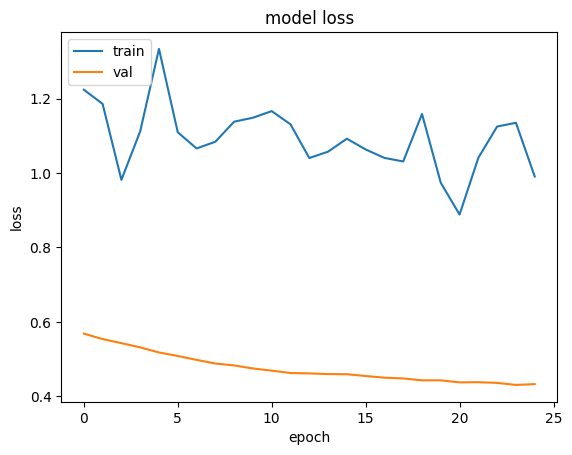

In [181]:
import matplotlib.pyplot as plt
%matplotlib inline
history = model.fit(X_train, y_train, epochs=25, batch_size=64, validation_split=0.2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()#val упал, но график всё ещё плох.

In [185]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l2

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
model.fit(X_train, y_train, epochs=25, batch_size=64, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')#улучшил регуляризацию,экспериментирую с дропаутами и моделями активации.

Epoch 1/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.4803 - loss: 1.4933 - val_accuracy: 0.6434 - val_loss: 1.2675
Epoch 2/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5272 - loss: 1.3551 - val_accuracy: 0.7343 - val_loss: 1.2082
Epoch 3/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5501 - loss: 1.2948 - val_accuracy: 0.7483 - val_loss: 1.1588
Epoch 4/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6990 - loss: 1.1635 - val_accuracy: 0.7483 - val_loss: 1.1153
Epoch 5/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6486 - loss: 1.1861 - val_accuracy: 0.7413 - val_loss: 1.0763
Epoch 6/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6909 - loss: 1.1422 - val_accuracy: 0.7552 - val_loss: 1.0419
Epoch 7/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7135 - loss: 1.0882 - val_accuracy: 0.7622 - val_loss: 1.0095
Epoch 8/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7243 - loss: 1.0736 - val_accuracy: 0.7622 - val_loss: 0.9777
Epoch 9

Epoch 1/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8099 - loss: 0.7207 - val_accuracy: 0.8322 - val_loss: 0.6481
Epoch 2/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8074 - loss: 0.7224 - val_accuracy: 0.8322 - val_loss: 0.6384
Epoch 3/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7931 - loss: 0.7139 - val_accuracy: 0.8252 - val_loss: 0.6294
Epoch 4/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7979 - loss: 0.6889 - val_accuracy: 0.8252 - val_loss: 0.6206
Epoch 5/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7921 - loss: 0.6969 - val_accuracy: 0.8322 - val_loss: 0.6122
Epoch 6/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8141 - loss: 0.6380 - val_accuracy: 0.8322 - val_loss: 0.6053
Epoch 7/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7996 - loss: 0.6785 - val_accuracy: 0.8392 - val_loss: 0.5985
Epoch 8/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7951 - loss: 0.6938 - val_accuracy: 0.8392 - val_loss: 0.5922
Epoch 9

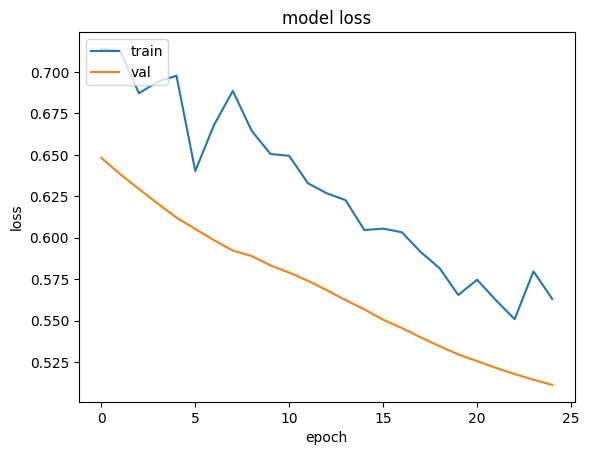

In [186]:
import matplotlib.pyplot as plt
%matplotlib inline
history = model.fit(X_train, y_train, epochs=25, batch_size=64, validation_split=0.2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()#график у этой модели пока лучший

In [192]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l2

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the neural network model
model = Sequential()
model.add(Dense(64, activation='tanh', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.1))
model.add(Dense(32, activation='tanh', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
# Train the model
model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')#уменьшил дропаут

Epoch 1/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7018 - loss: 1.2556 - val_accuracy: 0.7692 - val_loss: 1.1105
Epoch 2/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7833 - loss: 1.1001 - val_accuracy: 0.8252 - val_loss: 1.0068
Epoch 3/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7629 - loss: 1.0156 - val_accuracy: 0.8182 - val_loss: 0.9377
Epoch 4/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8146 - loss: 0.9477 - val_accuracy: 0.8182 - val_loss: 0.8833
Epoch 5/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7966 - loss: 0.9125 - val_accuracy: 0.8252 - val_loss: 0.8408
Epoch 6/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7946 - loss: 0.8827 - val_accuracy: 0.8112 - val_loss: 0.8045
Epoch 7/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8025 - loss: 0.8051 - val_accuracy: 0.8252 - val_loss: 0.7676
Epoch 8/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8052 - loss: 0.7869 - val_accuracy: 0.8182 - val_loss

Epoch 1/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7827 - loss: 0.5663 - val_accuracy: 0.8322 - val_loss: 0.4983
Epoch 2/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8106 - loss: 0.5355 - val_accuracy: 0.8322 - val_loss: 0.4966
Epoch 3/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8138 - loss: 0.5280 - val_accuracy: 0.8322 - val_loss: 0.4944
Epoch 4/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8139 - loss: 0.5238 - val_accuracy: 0.8252 - val_loss: 0.4905
Epoch 5/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8087 - loss: 0.5148 - val_accuracy: 0.8322 - val_loss: 0.4865
Epoch 6/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7754 - loss: 0.5705 - val_accuracy: 0.8322 - val_loss: 0.4850
Epoch 7/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7974 - loss: 0.5062 - val_accuracy: 0.8322 - val_loss: 0.4823
Epoch 8/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8055 - loss: 0.5286 - val_accuracy: 0.8322 - val_loss: 0.4801
Epoch 9

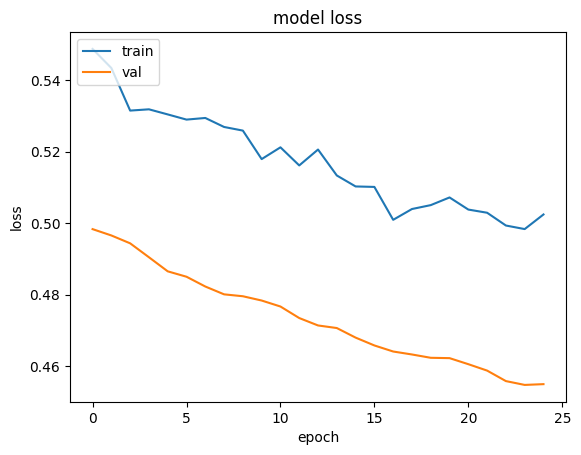

In [193]:
import matplotlib.pyplot as plt
%matplotlib inline
history = model.fit(X_train, y_train, epochs=25, batch_size=64, validation_split=0.2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [194]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l2

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the neural network model
model = Sequential()
model.add(Dense(32, activation='tanh', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(16, activation='tanh', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])#добавил learning_rate Адаму =0.001
# Train the model
model.fit(X_train, y_train, epochs=25, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')#уменьшил число нейронов, увеличил дропаут, результат тот же. 

Epoch 1/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5182 - loss: 1.1478 - val_accuracy: 0.6783 - val_loss: 1.0152
Epoch 2/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6319 - loss: 1.0214 - val_accuracy: 0.7692 - val_loss: 0.9150
Epoch 3/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6784 - loss: 0.9566 - val_accuracy: 0.7972 - val_loss: 0.8514
Epoch 4/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7103 - loss: 0.9203 - val_accuracy: 0.8182 - val_loss: 0.8074
Epoch 5/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7287 - loss: 0.8828 - val_accuracy: 0.8322 - val_loss: 0.7710
Epoch 6/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7401 - loss: 0.8590 - val_accuracy: 0.8462 - val_loss: 0.7453
Epoch 7/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7841 - loss: 0.7966 - val_accuracy: 0.8252 - val_loss: 0.7222
Epoch 8/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7799 - loss: 0.7887 - val_accuracy: 0.8252 - val_loss

Epoch 1/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8085 - loss: 0.5680 - val_accuracy: 0.8322 - val_loss: 0.5322
Epoch 2/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8114 - loss: 0.5575 - val_accuracy: 0.8252 - val_loss: 0.5293
Epoch 3/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7779 - loss: 0.6179 - val_accuracy: 0.8182 - val_loss: 0.5273
Epoch 4/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7833 - loss: 0.5927 - val_accuracy: 0.8182 - val_loss: 0.5254
Epoch 5/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7820 - loss: 0.5790 - val_accuracy: 0.8182 - val_loss: 0.5230
Epoch 6/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8110 - loss: 0.5808 - val_accuracy: 0.8252 - val_loss: 0.5199
Epoch 7/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7963 - loss: 0.5585 - val_accuracy: 0.8252 - val_loss: 0.5179
Epoch 8/25
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8147 - loss: 0.5767 - val_accuracy: 0.8252 - val_loss: 0.5156
Epoch 9

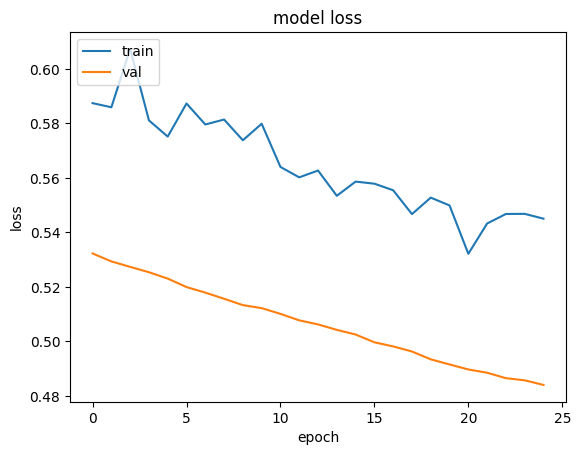

In [195]:
import matplotlib.pyplot as plt
%matplotlib inline
history = model.fit(X_train, y_train, epochs=25, batch_size=64, validation_split=0.2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()#лосс всё ещё большой

Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5844 - loss: 1.3522 - val_accuracy: 0.8322 - val_loss: 1.1231
Epoch 2/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7630 - loss: 1.1597 - val_accuracy: 0.8322 - val_loss: 1.0306
Epoch 3/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7760 - loss: 1.0829 - val_accuracy: 0.8252 - val_loss: 0.9752
Epoch 4/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7711 - loss: 1.0481 - val_accuracy: 0.8182 - val_loss: 0.9324
Epoch 5/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7672 - loss: 1.0010 - val_accuracy: 0.8252 - val_loss: 0.8944
Epoch 6/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7877 - loss: 0.9731 - val_accuracy: 0.8252 - val_loss: 0.8604
Epoch 7/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7950 - loss: 0.9103 - val_accuracy: 0.8252 - val_loss: 0.8277
Epoch 8/30
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7905 - loss: 0.8733 - val_accuracy: 0.8322 - val_loss: 0.7985
Ep

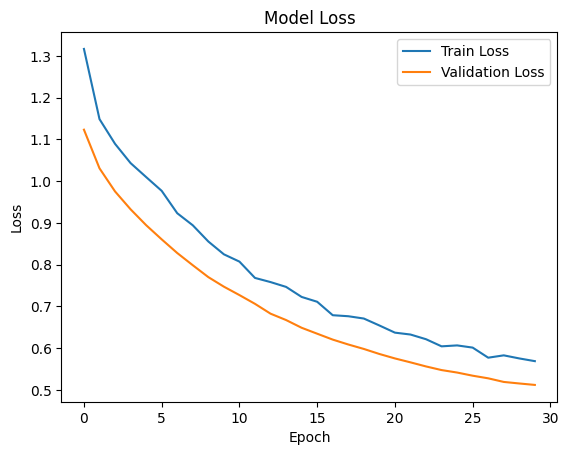

In [198]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

# Предварительная обработка данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Создание модели нейронной сети
model = Sequential()
model.add(Dense(64, activation='tanh', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)))  # Увеличил количество нейронов
model.add(Dropout(0.3))
model.add(Dense(32, activation='tanh', kernel_regularizer=l2(0.01)))  # Увеличил количество нейронов
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)#добавил early stopping

history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_split=0.2, callbacks=[early_stopping])#попробую протестировать на 30 эпохах

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()#график стал хорошим


Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.6808 - loss: 1.2712 - val_accuracy: 0.7762 - val_loss: 1.1781
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7335 - loss: 1.1870 - val_accuracy: 0.7622 - val_loss: 1.1028
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7643 - loss: 1.1114 - val_accuracy: 0.7762 - val_loss: 1.0412
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7523 - loss: 1.0628 - val_accuracy: 0.7902 - val_loss: 0.9903
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7622 - loss: 1.0239 - val_accuracy: 0.8112 - val_loss: 0.9454
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7910 - loss: 0.9618 - val_accuracy: 0.7972 - val_loss: 0.9037
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8293 - loss: 0.9283 - val_accuracy: 0.8112 - val_loss: 0.8664
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8338 - loss: 0.8782 - val_accuracy: 0.8182 - val_loss: 0.8336
Epoch 9/30
9/9 ━━━

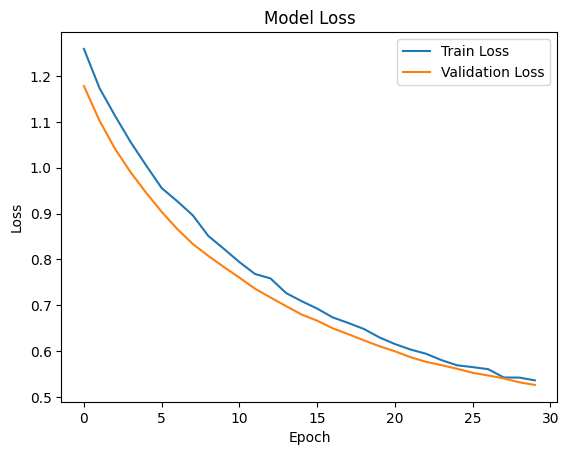

In [199]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

# Предварительная обработка данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Создание модели нейронной сети
model = Sequential()
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)))  
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))  # изменил активацию на relu
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_split=0.2, callbacks=[early_stopping])#увеличил batch_size с 32 до 64

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()#график стал лучше и точность повысилась, пока что это лучшая модель


In [213]:

df = df.drop('PassengerId', axis=1)
df = df.drop('Name', axis=1)
df
#попробую оптимизировать датасет

,Survived,Pclass,Sex,Ticket,Fare,Cabin,Embarked,AgeGroup,Family_Size,Status
0,0,3,1,523,7.2500,147,2,3,1,2
1,1,1,0,596,71.2833,81,0,0,1,3
2,1,3,0,669,7.9250,147,2,0,0,1
3,1,1,0,49,53.1000,55,2,0,1,3
4,0,3,1,472,8.0500,147,2,0,0,2
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,101,13.0000,147,2,0,0,2
887,1,1,0,14,30.0000,30,2,3,0,1
888,0,3,0,675,23.4500,147,2,3,3,1
889,1,1,1,8,30.0000,60,0,0,0,2


Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.4826 - loss: 1.3506 - val_accuracy: 0.6713 - val_loss: 1.2462
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6326 - loss: 1.2620 - val_accuracy: 0.7762 - val_loss: 1.1704
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7184 - loss: 1.1808 - val_accuracy: 0.8182 - val_loss: 1.1047
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7734 - loss: 1.1074 - val_accuracy: 0.8322 - val_loss: 1.0457
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7556 - loss: 1.0660 - val_accuracy: 0.8252 - val_loss: 0.9928
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8070 - loss: 0.9997 - val_accuracy: 0.8462 - val_loss: 0.9437
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8172 - loss: 0.9564 - val_accuracy: 0.8462 - val_loss: 0.8996
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8108 - loss: 0.9135 - val_accuracy: 0.8392 - val_loss: 0.8614
Epoch 9/30
9/9 ━━━

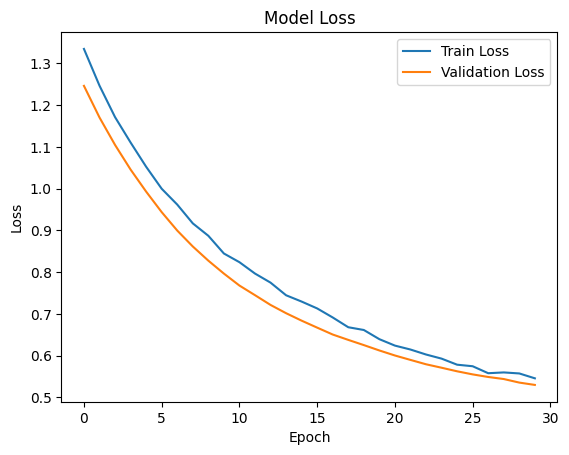

In [216]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = Sequential()
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)))  
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))  
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()#смотрим на изменения, а их нет


Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.6084 - loss: 1.2964 - val_accuracy: 0.6503 - val_loss: 1.2114
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6198 - loss: 1.2155 - val_accuracy: 0.6503 - val_loss: 1.1367
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6208 - loss: 1.1482 - val_accuracy: 0.6503 - val_loss: 1.0757
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6122 - loss: 1.0984 - val_accuracy: 0.6573 - val_loss: 1.0237
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6351 - loss: 1.0567 - val_accuracy: 0.7133 - val_loss: 0.9718
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6804 - loss: 0.9958 - val_accuracy: 0.7343 - val_loss: 0.9231
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7095 - loss: 0.9614 - val_accuracy: 0.7762 - val_loss: 0.8812
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7467 - loss: 0.9117 - val_accuracy: 0.7972 - val_loss: 0.8411
Epoch 9/30
9/9 ━━━

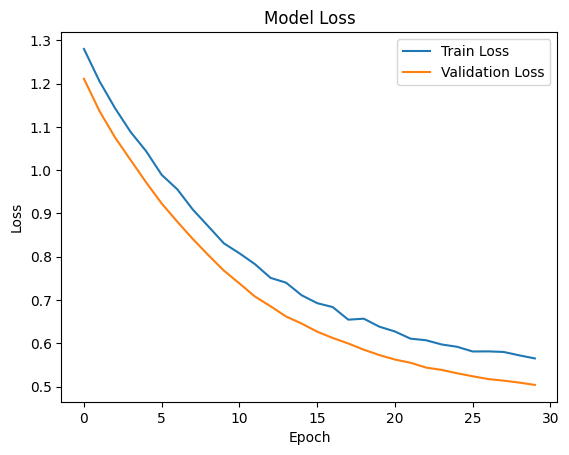

In [217]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)

model = Sequential()
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)))  
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01))) 
model.add(Dropout(0.1))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()#пробую использовать MinMaxscaler, результат плачевный


Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.6242 - loss: 2.1636 - val_accuracy: 0.6713 - val_loss: 2.0136
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6789 - loss: 1.9803 - val_accuracy: 0.7343 - val_loss: 1.8433
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7010 - loss: 1.8350 - val_accuracy: 0.7692 - val_loss: 1.6850
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7407 - loss: 1.6780 - val_accuracy: 0.8322 - val_loss: 1.5411
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8006 - loss: 1.5253 - val_accuracy: 0.8252 - val_loss: 1.4147
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7707 - loss: 1.4597 - val_accuracy: 0.8182 - val_loss: 1.3127
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7881 - loss: 1.3565 - val_accuracy: 0.8252 - val_loss: 1.2217
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8158 - loss: 1.2460 - val_accuracy: 0.8252 - val_loss: 1.1375
Epoch 9/30
9/9 ━━━

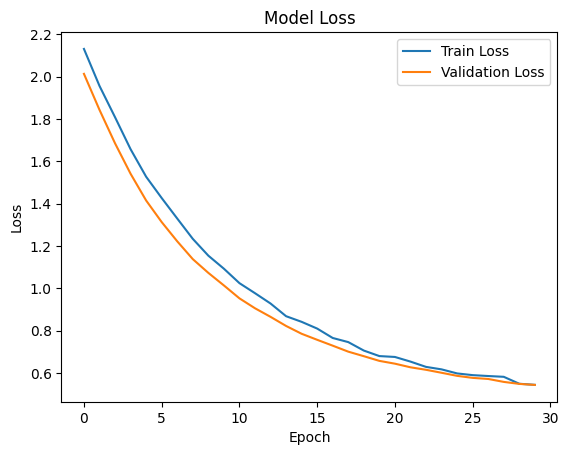

In [227]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = Sequential()
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)))  
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))  #увеличил количество нейронов на двух предыдущих слоях
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01))) #добавил ещё один слой модели 
model.add(Dropout(0.2))#увеличил дропаут до 0.2, пробовал с 0.3 - результат хуже.
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()#график стал ещё лучше


Epoch 1/30


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step - accuracy: 0.5608 - loss: 3.0804 - val_accuracy: 0.8067 - val_loss: 2.7484
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7312 - loss: 2.7092 - val_accuracy: 0.8571 - val_loss: 2.4151
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7814 - loss: 2.3804 - val_accuracy: 0.8403 - val_loss: 2.1295
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8056 - loss: 2.1444 - val_accuracy: 0.8487 - val_loss: 1.9009
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8183 - loss: 1.8836 - val_accuracy: 0.8403 - val_loss: 1.7102
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8340 - loss: 1.7149 - val_accuracy: 0.8319 - val_loss: 1.5378
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8278 - loss: 1.5452 - val_accuracy: 0.8403 - val_loss: 1.4024
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8602 - loss: 1.3769 - val_accuracy: 0.8403 - val_loss: 1.2777
Epoch 9/30
8/8 ━━━

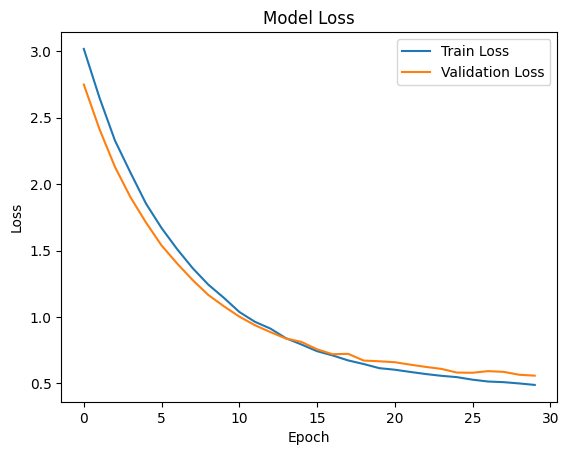

In [306]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = Sequential()
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)))  
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))  
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01))) 
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()#пробую разное количество нейронов


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 42ms/step - accuracy: 0.4221 - loss: 2.9520 - val_accuracy: 0.6294 - val_loss: 1.8838
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4048 - loss: 3.1605 - val_accuracy: 0.7273 - val_loss: 1.7910
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4387 - loss: 3.0667 - val_accuracy: 0.6713 - val_loss: 1.7005
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4310 - loss: 2.8802 - val_accuracy: 0.6503 - val_loss: 1.6130
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4304 - loss: 2.4363 - val_accuracy: 0.6503 - val_loss: 1.5300
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4333 - loss: 2.6080 - val_accuracy: 0.6503 - val_loss: 1.4514
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4402 - loss: 2.5886 - val_accuracy: 0.6503 - val_loss: 1.3778
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4445 - loss: 2.5239 - val_accuracy: 0.6503 - val_loss: 1.3087
Epoch 9

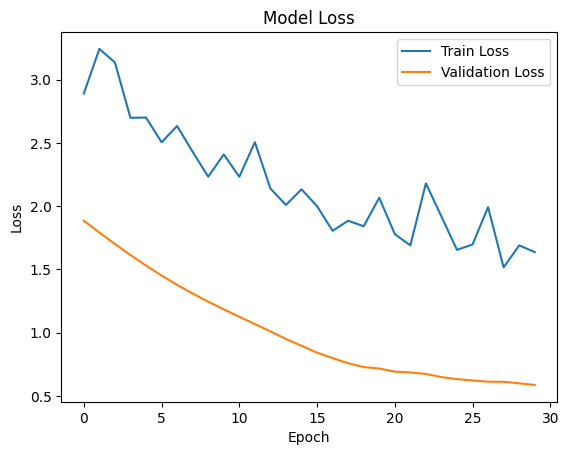

In [237]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = Sequential()
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)))  
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))  
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01))) 
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01))) 
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01))) 
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.add(Dropout(0.2))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=30, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()#пробую увеличивать количество слоев, результат хуже


Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.6162 - loss: 1.8185 - val_accuracy: 0.6503 - val_loss: 1.6962
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5876 - loss: 1.7135 - val_accuracy: 0.6503 - val_loss: 1.6021
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6291 - loss: 1.6037 - val_accuracy: 0.6503 - val_loss: 1.5060
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5928 - loss: 1.5228 - val_accuracy: 0.6503 - val_loss: 1.4142
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6142 - loss: 1.4428 - val_accuracy: 0.6503 - val_loss: 1.3304
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6398 - loss: 1.3405 - val_accuracy: 0.6503 - val_loss: 1.2518
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5857 - loss: 1.3103 - val_accuracy: 0.6503 - val_loss: 1.1822
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6481 - loss: 1.2146 - val_accuracy: 0.6573 - val_loss: 1.1187
Epoch 9/50
9/9 ━━━

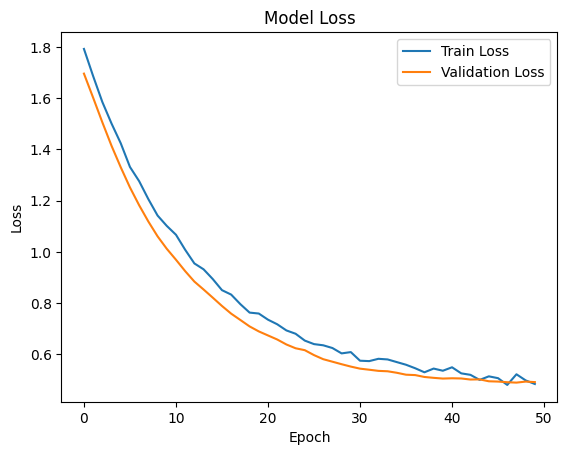

In [316]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = Sequential()
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01))) 
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01))) 
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=[early_stopping])

loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()#график стал ещё лучше, возьму эту модель за пример лучшей.


/tmp/ipykernel_30/3331051951.py:15: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  y = y.ravel()  # Преобразование целевой переменной в одномерный массив
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 1
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Classification Report for Fold 1:
               precision    recall  f1-score   support

           0       0.85      0.90      0.87       177
           1       0.83      0.76      0.79       120

    accuracy                           0.84       297
   macro avg       0.84      0.83      0.83       297
weighted avg       0.84      0.84      0.84       297

Confusion Matrix for Fold 1:
 [[159  18]
 [ 29  91]]
Fold 2


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Classification Report for Fold 2:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       185
           1       0.78      0.73      0.76       112

    accuracy                           0.82       297
   macro avg       0.81      0.80      0.81       297
weighted avg       0.82      0.82      0.82       297

Confusion Matrix for Fold 2:
 [[162  23]
 [ 30  82]]
Fold 3


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Classification Report for Fold 3:
               precision    recall  f1-score   support

           0       0.83      0.84      0.84       187
           1       0.73      0.71      0.72       110

    accuracy                           0.79       297
   macro avg       0.78      0.78      0.78       297
weighted avg       0.79      0.79      0.79       297

Confusion Matrix for Fold 3:
 [[158  29]
 [ 32  78]]


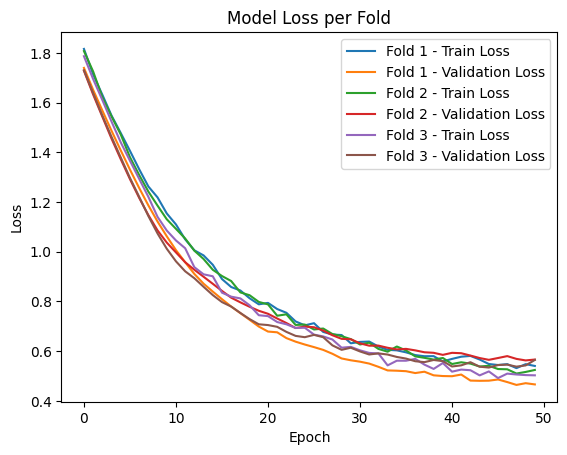

In [293]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt


scaler = StandardScaler()
X = scaler.fit_transform(X)
y = y.ravel()  

kf = KFold(n_splits=3, shuffle=True, random_state=42)
fold = 1

for train_index, test_index in kf.split(X):
    print(f"Fold {fold}")
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

   
    model = Sequential([
        Dense(128, activation='relu', kernel_regularizer=l2(0.01), input_shape=(X_train.shape[1],)),
        Dropout(0.2),
        Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.2),
        Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.2),
        Dense(16, activation='relu', kernel_regularizer=l2(0.01)),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])

   
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

    
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

    
    history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=[early_stopping], verbose=0)

    
    y_pred = (model.predict(X_test) > 0.5).astype("int32").ravel()

    
    print(f"Classification Report for Fold {fold}:\n", classification_report(y_test, y_pred))
    print(f"Confusion Matrix for Fold {fold}:\n", confusion_matrix(y_test, y_pred))
    
    
    plt.plot(history.history['loss'], label=f'Fold {fold} - Train Loss')
    plt.plot(history.history['val_loss'], label=f'Fold {fold} - Validation Loss')

    fold += 1

plt.title('Model Loss per Fold')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()#кросс-валидация по трём фолдам для лучшей модели


Вывод: 
в первом фолде:
Модель предсказала, что пассажир выживет, и он действительно выжил 159
Модель предсказала, что пассажир погибнет, и он действительно погиб 91
Модель предсказала, что пассажир погибнет, но он выжил 18
Модель предсказала, что пассажир выживет, но он погиб 29

Ключевые метрики:
Точность предсказания "выживет": 0.85
Точность предсказанияпогибнет": 0.83
Средняя точность: 0.84

во втором фолде:
Модель предсказала, что пассажир выживет, и он действительно выжил 162
Модель предсказала, что пассажир погибнет, и он действительно погиб 82
Модель предсказала, что пассажир погибнет, но он выжил 23
Модель предсказала, что пассажир выживет, но он погиб 30

Ключевые метрики:
Точность предсказания"выживет" : 0.84
Точность предсказания "погибнет": 0.78
Средняя точность: 0.82

В третьем фолде:
Модель предсказала, что пассажир выживет, и он действительно выжил 158
Модель предсказала, что пассажир погибнет, и он действительно погиб 78
Модель предсказала, что пассажир погибнет, но он выжил 29
Модель предсказала, что пассажир выживет, но он погиб 32

Ключевые метрики:

Точность предсказания "выживет" 0.83
Точность предсказания  "погибнет" 0.73
Средняя точность: 0.79


Окончательный вывод:

Модель показала устойчивые результаты в каждом фолде кросс-валидации, с точностью от 0.79 до 0.84. В случае, если модель ошибалась, чаще всего это происходило при предсказании класса "выживет" для тех, кто фактически погиб , что может говорить о том, что модель немного недооценивает вероятность гибели пассажира. Основные показатели метрик для каждого фолда также подтверждают, что модель достигает приемлемой точности при классификации обеих категорий, с несколько более высокой точностью при предсказании выживших.